In [4]:
import numpy as np
import pandas as pd

Оценим собранные данные.

In [5]:
data = pd.read_csv('data/RealEstate_data.csv', sep='=')

In [6]:
data.head()

,type,district,address,level,total_area,living_area,kitchen_area,description,price
0,Двухкомнатная брежневка,NaN,"Им. газеты ""Правда"" 52",4/5,42.1,27.0,6.0,"Район с развитой инфраструктурой, рядом ""Парк ...",3050.0
1,Однокомнатная улучшенная,Орджоникидзевский,ул Зеленый лог 34,10/10,49.2,25.0,13.0,"Продам квартиру в отличном состоянии, лоджия з...",3800.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Однокомнатная малосемейка,Правобережный,Советской Армии 37/1,4/9,22.0,12.0,6.0,"Продаётся однокомнатная квартира ""малосемейка""...",1800.0
4,Однокомнатная хрущевка,Ленинский,Казакова 6,5/5,30.0,18.2,5.6,Продам 1 комнатную квартиру в Ленинском районе...,2200.0


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 461 entries, 0 to 460
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   type          442 non-null    object 
 1   district      252 non-null    object 
 2   address       445 non-null    object 
 3   level         451 non-null    object 
 4   total_area    450 non-null    float64
 5   living_area   451 non-null    float64
 6   kitchen_area  451 non-null    float64
 7   description   442 non-null    object 
 8   price         451 non-null    float64
dtypes: float64(4), object(5)
memory usage: 32.5+ KB


## Удаление пустых ячеек
Для работы необходима информация о районе или адресе квартиры. Если нет ни той, ни другой, то запись можно удалить.

In [8]:
for index in data.index:
    if data.loc[index, 'address'] is np.nan and data.loc[index, 'district'] is np.nan:
        data = data.drop(index=index)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 445 entries, 0 to 460
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   type          436 non-null    object 
 1   district      252 non-null    object 
 2   address       445 non-null    object 
 3   level         445 non-null    object 
 4   total_area    444 non-null    float64
 5   living_area   445 non-null    float64
 6   kitchen_area  445 non-null    float64
 7   description   436 non-null    object 
 8   price         445 non-null    float64
dtypes: float64(4), object(5)
memory usage: 50.9+ KB


## Приведение информации о числе комнат в числовой вид

In [10]:
def get_rooms(df, column_name):
    results_list = []
    for index in df.index:
        description = df.loc[index, column_name]
        if description is np.nan:
            results_list.append(np.nan)
            continue
        description = description.lower()
        if 'шестикомн' in description:
            results_list.append('6')        
        elif 'пятикомн' in description:
            results_list.append('5')
        elif 'четырехкомн' in description:
            results_list.append('4')
        elif 'трехкомн' in description:
            results_list.append('3')
        elif 'двухкомн' in description or '2х комн' in description:
            results_list.append('2')
        elif 'однокомн' in description or 'студи' in description:
            results_list.append('1') 
        elif 'многокомн' in description:
            results_list.append('многокомн')
        else:
            results_list.append(np.nan)
        
    return results_list

Иногда эта информация указывается в типе квартиры, а иногда в описании. Соберем информацию из обоих источников.

In [11]:
rooms_1 = get_rooms(data, 'type')
len(rooms_1)

445

In [12]:
rooms_2 = get_rooms(data, 'description')
len(rooms_2)

445

In [10]:
def unite_lists(list_1, list_2):
    results = []
    for element_1, element_2 in zip(list_1, list_2):
        if element_1 == element_2:
            results.append(element_1)
        elif (element_1 is np.nan) and (element_2 is not np.nan):
            results.append(element_2)
        elif (element_2 is np.nan) and (element_1 is not np.nan):
            results.append(element_1)
        else:
            results.append(np.nan)
    return results

In [11]:
total_rooms = unite_lists(rooms_1, rooms_2)
len(total_rooms)

445

In [12]:
data = pd.concat([data, pd.Series(total_rooms, name='rooms', index=data.index)], axis=1)

In [13]:
data = data.drop(columns='type')

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 445 entries, 0 to 460
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   district      252 non-null    object 
 1   address       445 non-null    object 
 2   level         445 non-null    object 
 3   total_area    444 non-null    float64
 4   living_area   445 non-null    float64
 5   kitchen_area  445 non-null    float64
 6   description   436 non-null    object 
 7   price         445 non-null    float64
 8   rooms         429 non-null    object 
dtypes: float64(4), object(5)
memory usage: 50.9+ KB


Оставниеся несколько значений дозаполним вручную. При невозможности, удалим ячейки.

In [15]:
data[data['rooms'].isna()]

,district,address,level,total_area,living_area,kitchen_area,description,price,rooms
8,NaN,Карла Маркса 231,10/10,26.0,0.0,0.0,NaN,2300.0,NaN
108,NaN,ул. Горнолыжная 26,2/2,36.0,28.0,3.0,В продаже шикарные двух комнатные апартаменты ...,3700.0,NaN
169,Орджоникидзевский (левый берег),Пионерская 4,3/4,91.0,70.0,10.0,В продаже шикарная пятикомнатная квартира в це...,3500.0,NaN
178,Правобережный,Суворова 128,5/9,34.0,20.0,7.0,id:1151. Продам однокомнатную квартиру или обм...,2150.0,NaN
179,Орджоникидзевский,Бориса Ручьева 8/1,2/5,41.0,30.0,6.0,id:1150. Продам двухкомнатную квартиру с ремон...,2600.0,NaN
193,NaN,Сиреневый проезд 11/2,9/9,53.0,40.0,9.0,id:27797. ВНИМАНИЕ! ЭКСКЛЮЗИВНОЕ ПРЕДЛОЖЕНИЕ Р...,3500.0,NaN
232,Орджоникидзевский (левый берег),Трамвайная 30,3/4,43.0,30.0,6.0,"Уютная, теплая квартира. Пластиковые окна, нат...",2500.0,NaN
243,NaN,Калмыкова 14,8/9,65.0,45.0,8.0,id:26867. ВНИМАНИЕ! ЭКСКЛЮЗИВНОЕ ПРЕДЛОЖЕНИЕ Р...,4800.0,NaN
310,NaN,Ленина пр-т 114/4,5/14,40.0,18.0,13.0,id:5892. Предлогам Вашему вниманию интересное...,2620.0,NaN
320,NaN,ул Панькова 3,2/3,98.0,75.0,7.0,id:5856. ВНИМАНИЕ! ЭКСКЛЮЗИВНОЕ ПРЕДЛОЖЕНИЕ РИ...,4300.0,NaN


In [16]:
data.loc[108, 'rooms'] = '2'
data.loc[169, 'rooms'] = '5'
data.loc[178, 'rooms'] = '1'
data.loc[179, 'rooms'] = '2'
data.loc[193, 'rooms'] = '2'
data.loc[232, 'rooms'] = '2'
data.loc[243, 'rooms'] = '3'
data.loc[320, 'rooms'] = '5'
data.loc[366, 'rooms'] = '1'
data.loc[420, 'rooms'] = '3'
data.loc[428, 'rooms'] = '3'
data.loc[440, 'rooms'] = '2'
data.loc[454, 'rooms'] = '1'

In [17]:
data = data.drop(index=data[data['rooms'].isna()].index)

## Работа с этажностью

Создадим 4 колонки: этаж, где расположена квартира; количество этажей в доме; расположена ли квартира на перавом этаже и расположена ли она на последнем этаже.

In [18]:
def level_grade(df, column_name):
    grade = pd.DataFrame(columns=['level', 'first', 'last', 'max_level'], index=df.index)
    grade['first'] = 0
    grade['last'] = 0
    
    for index in df.index:
        text = df.loc[index, column_name]
        if text is np.nan:
            grade.loc[index, 'level'] = np.nan
            continue
        parts = text.split('/')
        grade.loc[index, 'level'] = parts[0]
        grade.loc[index, 'max_level'] = parts[1]
        if parts[0] == '1':
            grade.loc[index,'first'] = 1
        if parts[0] == parts[1]:
            grade.loc[index,'last'] = 1
    return grade

In [19]:
levels = level_grade(data, 'level')

In [20]:
data = data.drop(columns=['level'])

In [21]:
data = pd.concat([data, levels], axis=1)

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 442 entries, 0 to 460
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   district      252 non-null    object 
 1   address       442 non-null    object 
 2   total_area    441 non-null    float64
 3   living_area   442 non-null    float64
 4   kitchen_area  442 non-null    float64
 5   description   434 non-null    object 
 6   price         442 non-null    float64
 7   rooms         442 non-null    object 
 8   level         442 non-null    object 
 9   first         442 non-null    int64  
 10  last          442 non-null    int64  
 11  max_level     442 non-null    object 
dtypes: float64(4), int64(2), object(6)
memory usage: 61.1+ KB


## Дозаполнение информации о районах

Сначала приведем к единому виду имеющиеся записи.

In [23]:
data.groupby('district').nunique()

,address,total_area,living_area,kitchen_area,description,price,rooms,level,first,last,max_level
district,,,,,,,,,,,
Ленинский,73,63,41,19,74,60,4,9,2,2,7
Ленинский (Левый берег),1,1,1,1,1,1,1,1,1,1,1
Орджо,1,1,1,1,1,1,1,1,1,1,1
Орджоникидзевский,93,66,42,20,100,72,4,11,2,2,12
Орджоникидзевский (левый берег),13,11,9,5,14,12,4,4,2,2,5
Правобережный,52,45,33,14,52,50,4,10,2,2,10
орджоникидзевский,1,1,1,1,1,1,1,1,1,1,1
правобережный,1,1,1,1,1,1,1,1,1,1,1


In [24]:
data.loc[data[data['district'] == 'орджоникидзевский'].index, 'district'] = 'Орджоникидзевский'

In [25]:
data.loc[data[data['district'] == 'правобережный'].index, 'district'] = 'Правобережный'

In [26]:
data.loc[data[data['district'] == 'Орджо'].index, 'district'] = 'Орджоникидзевский'

In [27]:
data.loc[data[data['district'] == 'Ленинский (Левый берег)'].index, 'district'] = 'Ленинский (левый берег)'

In [28]:
data

,district,address,total_area,living_area,kitchen_area,description,price,rooms,level,first,last,max_level
0,NaN,"Им. газеты ""Правда"" 52",42.1,27.0,6.0,"Район с развитой инфраструктурой, рядом ""Парк ...",3050.0,2,4,0,0,5
1,Орджоникидзевский,ул Зеленый лог 34,49.2,25.0,13.0,"Продам квартиру в отличном состоянии, лоджия з...",3800.0,1,10,0,1,10
3,Правобережный,Советской Армии 37/1,22.0,12.0,6.0,"Продаётся однокомнатная квартира ""малосемейка""...",1800.0,1,4,0,0,9
4,Ленинский,Казакова 6,30.0,18.2,5.6,Продам 1 комнатную квартиру в Ленинском районе...,2200.0,1,5,0,1,5
5,NaN,Советской Армии 51,53.0,35.0,9.0,id:30409. Продается двухкомнатная квартира у...,4100.0,2,1,1,0,9
...,...,...,...,...,...,...,...,...,...,...,...,...
456,NaN,ул. Курортная 3,22.5,15.0,5.0,Продам квартиру-студию в новом гостиничном ком...,1580.0,1,2,0,0,5
457,Правобережный,Западное шоссе 95,67.2,45.0,12.0,Срочно продам уникальную квартиру с дизайнерск...,5000.0,3,1,1,0,2
458,Ленинский,Николая Шишка 22,74.0,56.0,9.0,Объявление актуально. Продам трёх комнатную кв...,5500.0,3,5,0,1,5
459,NaN,Молодежная 19А,41.0,22.2,7.2,"ПPОДАЁТCЯ 2 К.КВ., ПО АДРEСУ село Шухободь, ул...",930.0,2,1,1,0,5


In [29]:
data[data['district'].isna()]

,district,address,total_area,living_area,kitchen_area,description,price,rooms,level,first,last,max_level
0,NaN,"Им. газеты ""Правда"" 52",42.1,27.0,6.0,"Район с развитой инфраструктурой, рядом ""Парк ...",3050.0,2,4,0,0,5
5,NaN,Советской Армии 51,53.0,35.0,9.0,id:30409. Продается двухкомнатная квартира у...,4100.0,2,1,1,0,9
6,NaN,Карла Маркса 138/1,45.0,30.0,6.0,id:30394. Продам 2-к квартиру в Правобережном ...,3500.0,2,2,0,0,5
7,NaN,ул Мичурина 136/2,43.4,20.0,12.0,id:30388. О КВАРТИРЕ В квартир выполнен качест...,3550.0,1,3,0,0,10
9,NaN,Западное шоссе 101,68.0,40.0,0.0,id:30386. Продам ТРЕХкомнатную квартиру с обще...,6000.0,3,2,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...
445,NaN,Ленина пр-т,42.9,26.0,5.9,Квартира из категории заезжай и живи в центре ...,4800.0,2,5,0,1,5
452,NaN,Ленина пр-т 213а,35.0,0.0,10.0,"В продаже евро-двушка в Абзаково в Комплексе ""...",1850.0,1,1,1,1,1
453,NaN,ул. Горнолыжная 26,16.0,14.0,2.0,Жилой комплекс в с.Новоабзаково на первой бере...,1350.0,1,2,0,1,2
456,NaN,ул. Курортная 3,22.5,15.0,5.0,Продам квартиру-студию в новом гостиничном ком...,1580.0,1,2,0,0,5


Теперь будем дозаполнять данные с помощью информации о принадлежности адресов к отделениям связи. Кроме того, дополнительно проверяется некоторое количество улиц, расположенных на левом и на правом берегу реки. Здесь разделение проводится по номерам домов.

Список улицдомов на правом берегу реки.

In [30]:
streets_right = pd.read_csv('right_bank.csv', sep=';')

In [31]:
streets_right

,street,houses
0,Тепличный пер.,"1, 2, 3, 4, 5, 6, 204, 205"
1,ул. Приуральская,"1, 3, 5, 6, 7, 8, 10, 11, 12, 13, 14, 15, 16, ..."
2,ул. Жасминовая,"1, 2, 3, 5, 6, 8, 10, 11, 12, 13, 14, 15, 16, ..."
3,ул. Зеленодольская,"1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14,..."
4,ул. Таманская,"2, 13, 17, 18/1, 19, 19А, 20/1, 21, 21/1, 21/2..."
...,...,...
644,ул. Лазурная,"6, 10, 12, 14, 15, 100, 54/1, 69А, 70, 98"
645,Речной пер.,"4, 5, 6, 7, 8"
646,ул. Лучистая,22/а
647,ул. Александра Лозневого,"8, 10, 14, 22, 26, 27, 33, 36, 49, 51"


In [32]:
right_bank = []
for index in streets_right.index:
    address = streets_right.loc[index, 'street']
    street = [word.strip('"') if word.istitle() and len(word)>2 and word.strip('"').isalpha() else ''
              for word in address.split()]
    street_string = ''
    for part in street:
        if len(part) > 0:
            street_string = street_string + part + ' '
    street_string = street_string.strip()
    
    if len(street_string) > 0:
        right_bank.append(street_string)

In [33]:
right_bank

['Тепличный',
 'Приуральская',
 'Жасминовая',
 'Зеленодольская',
 'Таманская',
 'Фестивальная',
 'Журавлиная',
 'Лакомка',
 'Североморская',
 'Абрикосовая',
 'Рубежная',
 'Липецкая',
 'Ялтинская',
 'Хрустальная',
 'Дальневосточная',
 'Уральский',
 'Астраханская',
 'Озерный',
 'Волынцева',
 'Богатырская',
 'Витебский',
 'Мраморная',
 'Воронежская',
 'Третьяковой',
 'Карла Маркса',
 'Дунайская',
 'Прибрежная',
 'Каштановая',
 'Ивана Неплюева',
 'Лебединая',
 'Подольская',
 'Калмыкова',
 'Ясный',
 'Красносельская',
 'Онежская',
 'Посадская',
 'Ботаническая',
 'Жемчужная',
 'Копейская',
 'Агатовая',
 'Клубничная',
 'Южный',
 'Алтайская',
 'Брянская',
 'Виноградная',
 'Любимая',
 'Отважный',
 'Фермерский',
 'Придорожная',
 'Гранитная',
 'Омская',
 'Дорожная',
 'Правобережные',
 'Лучистая',
 'Заветная',
 'Новая',
 'Карла Маркса',
 'Магнитка',
 'Зеленый',
 'Жукова',
 'Магнитки',
 'Зеленый',
 'Магнитка',
 'Зеленый',
 'Тевосяна',
 'Жукова',
 'Магнитки',
 'Зеленый',
 'Советская',
 'Звезда',
 'Жи

Теперь список улиц, расположенных в одном районе.

In [34]:
streets_one_district = pd.read_csv('all_streets.csv', sep=';')

In [35]:
streets_one_district

,street_name,houses,okato
0,Юности б-р,"11/1, 11/2, 11/3, 11/4, 11А, 15А, 18А, 3, 4, 5...",7.543838e+10
1,гск ГСК Голубой факел,Все,7.543837e+10
2,гск ПКГ Машиностроитель,"1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14,...",7.543837e+10
3,ж/д_рзд. 22-й,Все,7.543800e+10
4,Карталинский заезд,"1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 12, 13, 14, 15,...",7.543837e+10
...,...,...,...
1167,ш. Дачное,"10/1, 12, 12 стр 1, 2, 16, 20 стр 9, 22 стр 14...",7.543837e+10
1168,ш. Западное,"109, 73/6, 85/7, 89/2, 89/3, 89/5, 93, 93/1, 9...",7.543838e+10
1169,ш. Космонавтов,"36, 40/8, 55, 55 стр 1, 59А, 61, 61 стр 1, 61 ...",7.543837e+10
1170,ш. Фабричное,"1, 1 стр 11, 1 стр 15, 1 стр 21, 1 стр 3, 1 ст...",7.543837e+10


In [36]:
streets_one_district.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1172 entries, 0 to 1171
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   street_name  1172 non-null   object 
 1   houses       1172 non-null   object 
 2   okato        1161 non-null   float64
dtypes: float64(1), object(2)
memory usage: 27.6+ KB


In [37]:
single_street_dict = dict()
for index in streets_one_district.index:
    address = streets_one_district.loc[index, 'street_name']
    street = [word.strip('"') if word.istitle() and len(word)>2 and word.strip('"').isalpha() else ''
              for word in address.split()]
    street_string = ''
    for part in street:
        if len(part) > 0:
            street_string = street_string + part + ' '
    street_string = street_string.strip()
    if len(street_string) > 0:
        okato = streets_one_district.loc[index, 'okato']
        if okato == 75438372000:
            if street_string in right_bank:
                district = 'Ленинский'
            else:
                district = 'Ленинский (левый берег)'
        elif okato == 75438369000:
            if street_string in right_bank:
                district = 'Орджоникидзевский'
            else:
                district = 'Орджоникидзевский (левый берег)'
        elif okato == 75438375000:
            district = 'Правобережный'
        else:
            district = np.nan
        single_street_dict[street_string] = district

In [38]:
single_street_dict

{'Юности': 'Правобережный',
 'Голубой': 'Ленинский (левый берег)',
 'Машиностроитель': 'Ленинский',
 'Карталинский': 'Орджоникидзевский (левый берег)',
 'Малый': 'Ленинский',
 'Тверского': 'Орджоникидзевский (левый берег)',
 'Фурманова': 'Орджоникидзевский (левый берег)',
 'Плотина': nan,
 'Насосная': nan,
 'Общество': nan,
 'Пожарное': nan,
 'Азовский': 'Орджоникидзевский (левый берег)',
 'Акмолинский': 'Орджоникидзевский',
 'Амурский': 'Ленинский',
 'Апрельский': 'Орджоникидзевский',
 'Армении': 'Орджоникидзевский (левый берег)',
 'Бабушкина': 'Орджоникидзевский (левый берег)',
 'Барнаульский': 'Орджоникидзевский',
 'Барсучий': 'Ленинский',
 'Безымянный': 'Орджоникидзевский (левый берег)',
 'Бородинский': 'Орджоникидзевский (левый берег)',
 'Вахтангова': 'Орджоникидзевский (левый берег)',
 'Вербный': 'Орджоникидзевский',
 'Витебский': 'Орджоникидзевский',
 'Волочаевский': 'Орджоникидзевский (левый берег)',
 'Вяземского': 'Ленинский',
 'Гайдара': 'Орджоникидзевский (левый берег)',
 'Д

И, наконец, улицы охватывающие несколько районов с номерами домов.

In [39]:
streets_many_district = pd.read_csv('all_streets_1.csv', sep=';')

In [40]:
streets_many_district

,street_name,houses,okato
0,NaN,NaN,NaN
1,Зеленый проезд,"1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 11/1, 11/2,...",7.543838e+10
2,NaN,NaN,NaN
3,пр-кт Карла Маркса,50/1 стр 1,7.543837e+10
4,пр-кт Карла Маркса,"27, 27/1, 29, 30, 31, 31/1, 31А, 32, 33, 34, 3...",7.543837e+10
...,...,...,...
68,ул. Суворова,85,7.543837e+10
69,ул. Суворова,"100/8, 100/9, 101, 101/1, 89, 91, 93, 95, 97, ...",7.543838e+10
70,ул. Суворова,"112, 114, 114/1, 114/2, 114/3, 114/4, 114/5, 1...",7.543838e+10
71,ул. Суворова,"123, 123/1, 125, 125/1, 125/1 стр 1, 125/2, 12...",7.543838e+10


In [41]:
streets_many_district = streets_many_district.dropna()

In [42]:
streets_many_district.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62 entries, 1 to 72
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   street_name  62 non-null     object 
 1   houses       62 non-null     object 
 2   okato        62 non-null     float64
dtypes: float64(1), object(2)
memory usage: 1.9+ KB


In [43]:
many_street_dict = dict()
for index in streets_many_district.index:
    address = streets_many_district.loc[index, 'street_name']
    street = [word.strip('"') if word.istitle() and len(word)>2 and word.strip('"').isalpha() else ''
              for word in address.split()]
    street_string = ''
    for part in street:
        if len(part) > 0:
            street_string = street_string + part + ' '
    street_string = street_string.strip()
    
    houses = streets_many_district.loc[index, 'houses']
    
    if len(street_string) > 0:
        okato = streets_one_district.loc[index, 'okato']
        if okato == 75438372000:
            if street_string in right_bank:
                district = 'Ленинский'
            else:
                district = 'Ленинский (левый берег)'
        elif okato == 75438369000:
            if street_string in right_bank:
                district = 'Орджоникидзевский'
            else:
                district = 'Орджоникидзевский (левый берег)'
        elif okato == 75438375000:
            district = 'Правобережный'
        else:
            district = np.nan
        if many_street_dict.get(street_string, None) is None:
            many_street_dict[street_string] = dict()
            many_street_dict[street_string][houses] = district
        else:
            many_street_dict[street_string][houses] = district

In [44]:
many_street_dict

{'Зеленый': {'1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 11/1, 11/2, 11/3, 12, 13/1, 13/2, 14, 15, 16, 17, 18, 20, 22, 24, 26, 26А, 28, 3/1, 3А/1, 3А/2, 3Б/1, 3Б/2, 7/3, 9/1, 9/2, 9/3': 'Ленинский'},
 'Карла Маркса': {'50/1 стр 1': nan,
  '27, 27/1, 29, 30, 31, 31/1, 31А, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 45/1, 45/2, 45/3, 45/4, 45/5, 46, 47, 47/1, 47/10, 47/2, 47/3, 48, 49, 50, 50 стр 1, 50 стр 2, 50/1, 50/2, 50/3, 51, 52, 52 стр 1, 53, 54, 56, 58, 60, 60/2, 60А, 62, 64, 64/1, 64/8, 66, 68, 70, 72': 'Орджоникидзевский',
  '10, 12, 12/1, 12/2, 13, 14, 15, 16, 16/1, 16/2, 17, 18, 18/1, 6, 8, 20, 22, 22/8, 22А, 23, 24, 25, 8/1': 'Ленинский',
  '343, 345': 'Орджоникидзевский',
  '210, 210/8, 212, 216, 216/1, 218, 218/1, 218/2, 218/3, 218/8, 220, 220/1, 220/2, 220/2 стр 1, 220/2 стр 2, 221, 221 стр 1, 222, 222/8, 223, 224, 225, 226, 227, 228, 229, 229/1, 230, 230/1, 230/2, 230/7, 230/8, 231, 231/1, 231/2, 231/3, 231/7, 231/9, 233, 235, 237/2': 'Орджоникидзевский',
  '185, 185

Осталось проверить все данные из датасета и заполнить их из соответствующих списков.

In [45]:
for index in data[data['district'].isna()].index:
    address = data.loc[index, 'address']
    house = address.split()[-1]  
    street = [word.strip('"') if word.istitle() and len(word)>2 and word.strip('"').isalpha() else ''
              for word in address.split()]
    street_string = ''
    
    for part in street:
        if len(part) > 0:
            street_string = street_string + part + ' '
    street_string = street_string.strip()
    
    if street_string in many_street_dict.keys():
        for item in many_street_dict[street_string].keys():
            if house in item.split(', '):
                data.loc[index, 'district'] = many_street_dict[street_string].get(item, np.nan)
                break
    else:
        data.loc[index, 'district'] = single_street_dict.get(street_string, np.nan)

In [46]:
data.groupby('district').nunique()

,address,total_area,living_area,kitchen_area,description,price,rooms,level,first,last,max_level
district,,,,,,,,,,,
Ленинский,102,78,46,22,102,77,4,9,2,2,9
Ленинский (левый берег),4,4,4,3,4,4,4,4,2,2,3
Орджоникидзевский,139,96,51,27,161,106,4,12,2,2,12
Орджоникидзевский (левый берег),20,18,13,9,21,19,5,4,2,2,5
Правобережный,70,60,37,17,73,60,4,11,2,2,11


In [47]:
data[data['district'].isna()]['address'].unique()

array(['Карла Маркса 138/1', 'Торфяная 5/2', 'Ленина пр-т 212',
       'Ленина пр-т 214Б', 'Ленина пр-т 220', 'Ленина пр-т 212а',
       'Школьная 10', 'ул Титова 3', 'Карла Маркса 237/3',
       'ул. Курортная 8', 'Карла Маркса 139', 'Первостроителей 21',
       'ул. Горнолыжная 26', 'Карла Маркса 99/2', 'Ленина пр-т 210 стр.А',
       'Карла Маркса 102/1', 'Карла Маркса 92/1', 'ул. Курортная 81/1',
       '33 ул. Торфяная ', 'ул. Торфяная 5/2', 'Ленина пр-т 192а',
       'Ленина пр-т 129а', 'Ленина пр-т 129А', 'Ленина пр-т 114/4',
       'Ленина пр-т 87А', 'Зеленый Лог 63', 'Зеленый лог 33',
       'Зеленый Лог 27', 'Карла Маркса 155', 'Карла Маркса 214',
       'ул. Школьная 29/4', 'Курортная 19', 'ул Черемушки 13',
       'карла маркса 5', 'уральская 7/1', 'Центральная ',
       'ул. Курортная 10', '26 ул. Горнолыжная ', 'Ленина пр-т 87а',
       'Ленина пр-т 218', 'ул Зеленый лог 30/1', 'ул. Курортная 85к7',
       'ул. Курортная 23', 'Анджиевского 36А', 'Псекупская 128',
       '

Иногда оказались некорректно указаны адреса. Такие данные удалим.

In [48]:
data = data.drop(index=data[data['district'].isna()].index)

Теперь даннае об адресе нам не нужны. Удалим колонку.

In [49]:
data = data.drop(columns='address')

Также удалим данные без информации об общей площади квартиры.

In [50]:
data = data.drop(index=data[data['total_area'].isna()].index)

In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 369 entries, 0 to 460
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   district      369 non-null    object 
 1   total_area    369 non-null    float64
 2   living_area   369 non-null    float64
 3   kitchen_area  369 non-null    float64
 4   description   362 non-null    object 
 5   price         369 non-null    float64
 6   rooms         369 non-null    object 
 7   level         369 non-null    object 
 8   first         369 non-null    int64  
 9   last          369 non-null    int64  
 10  max_level     369 non-null    object 
dtypes: float64(4), int64(2), object(5)
memory usage: 34.6+ KB


# EDA

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

In [53]:
def show_data(df, column_name, cat=False):
    plt.figure(figsize=(5,3))
    sns.histplot(data=df[column_name]);
    plt.show()
    if not cat:
        print('min:', df[column_name].min())
        print('max:', df[column_name].max())

Посмотрим распределение данных по общей площади

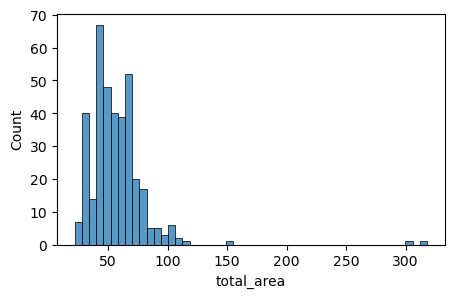

min: 21.8
max: 318.0


In [54]:
show_data(data, 'total_area')

Обратим внимание на самые низкие и самые высокие площади.

In [13]:
data[data['total_area'] == data['total_area'].min()]

,type,district,address,level,total_area,living_area,kitchen_area,description,price
303,Однокомнатная,NaN,Курортная 19,2/2,14.1,12.0,0.0,СТАРТ ПРОДАЖ !!!br Новая квартира студия на оз...,1339.0


In [56]:
data[data['total_area'] > 150]

,district,total_area,living_area,kitchen_area,description,price,rooms,level,first,last,max_level
383,Орджоникидзевский,304.0,17.0,6.0,id:4742. Продаётся просторная и уютная одноком...,2100.0,1,5,0,1,5
388,Правобережный,152.0,67.0,19.3,bЭксклюзивное предложение!/bbrПредлагаем Вашем...,7700.0,3,9,0,0,17
398,Ленинский,318.0,17.0,8.0,id:4295. Продаётся просторная и уютная одноко...,2650.0,1,10,0,1,10


Объект с малой площадью выглядит нормальным, а от нескольких больших квартир мы избавимся.

In [57]:
data = data.drop(index=data[data['total_area'] > 150].index)

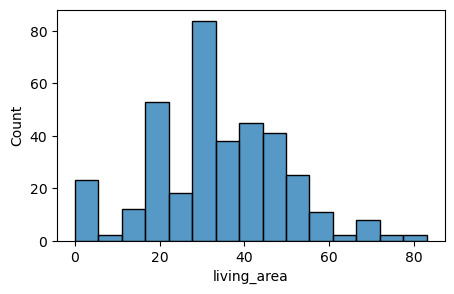

min: 0.0
max: 83.0


In [58]:
show_data(data, 'living_area')

Дозаполним нулевые значения жилой площади средними значениями, разбив данные на квантили по общей площади.

In [59]:
data[data['living_area'] == data['living_area'].min()].count()

district        23
total_area      23
living_area     23
kitchen_area    23
description     23
price           23
rooms           23
level           23
first           23
last            23
max_level       23
dtype: int64

In [60]:
total_area_bins=data['total_area'].quantile([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])
total_area_bins

0.0     21.80
0.1     32.90
0.2     42.00
0.3     44.70
0.4     48.40
0.5     53.15
0.6     59.00
0.7     64.65
0.8     67.20
0.9     76.60
1.0    114.00
Name: total_area, dtype: float64

In [61]:
data['total_area_groups'] = pd.cut(data['total_area'], total_area_bins, 
                                     labels=['0-0.25', '0.25-0.5', '0.5-0.3','0.3-0.4',
                                             '0.4-0.5', '0.5-0.6', '0.6-0.7', '0.7-0.8',
                                             '0.8-0.9', '0.9-1'],
                                     right=True, include_lowest=True)

In [62]:
mean_living_areas = data.groupby(['total_area_groups'])['living_area'].mean().round(1)

In [63]:
mean_living_areas['0.4-0.5']

29.6

In [64]:
for index in data[data['living_area'] == data['living_area'].min()].index:
    data.loc[index, 'living_area'] = mean_living_areas[data.loc[index, 'total_area_groups']]

In [65]:
data = data.drop(columns='total_area_groups')

Теперь площадь кухни.

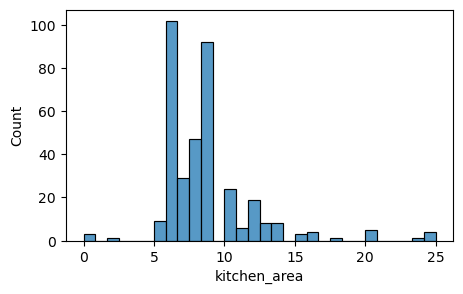

min: 0.0
max: 25.0


In [66]:
show_data(data, 'kitchen_area')

In [67]:
data[data['kitchen_area'] == data['kitchen_area'].min()]

,district,total_area,living_area,kitchen_area,description,price,rooms,level,first,last,max_level
9,Правобережный,68.0,40.0,0.0,id:30386. Продам ТРЕХкомнатную квартиру с обще...,6000.0,3,2,0,0,3
210,Орджоникидзевский,65.2,38.4,0.0,id:4836. В продаже уютная трёхкомнатная кварти...,4600.0,3,9,0,1,9
364,Орджоникидзевский,63.4,38.6,0.0,id:1182. Продается теплая полусмежная трехкомн...,530.0,3,1,1,0,2


In [68]:
data['kitchen_area'].mode()[0]

6.0

Здесь пропуски заполним просто значением моды по этому показателю.

In [69]:
data.loc[data[data['kitchen_area'] == 0].index, 'kitchen_area'] = data['kitchen_area'].mode()[0]

Признаки количество комнат, этажность дома и район выглядят нормально.

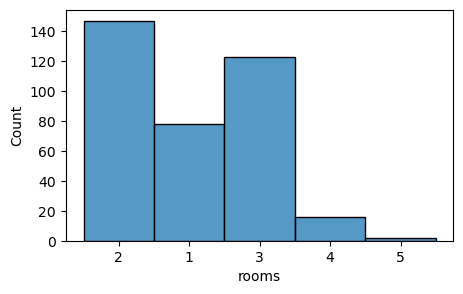

In [70]:
show_data(data, 'rooms', cat=True)

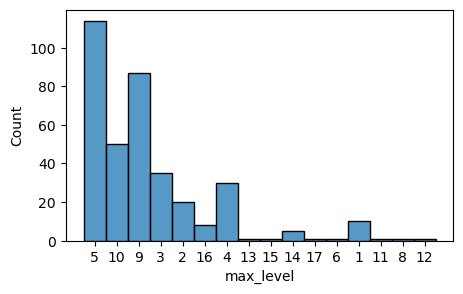

In [71]:
show_data(data, 'max_level', cat=True)

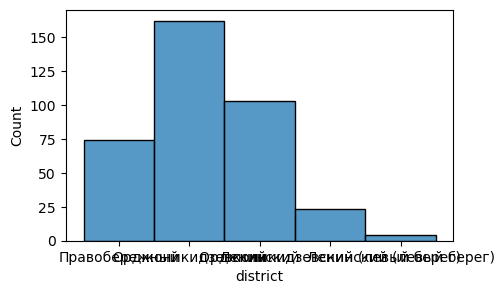

In [72]:
show_data(data, 'district', cat=True)

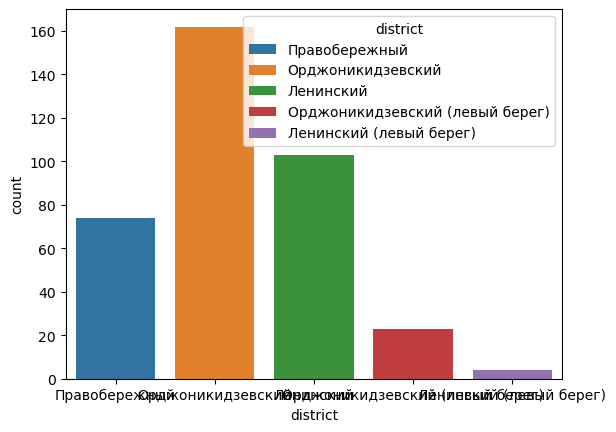

In [85]:
sns.countplot(data=data, x='district', hue='district', dodge=False);

Теперь перейдем к целевой переменной.

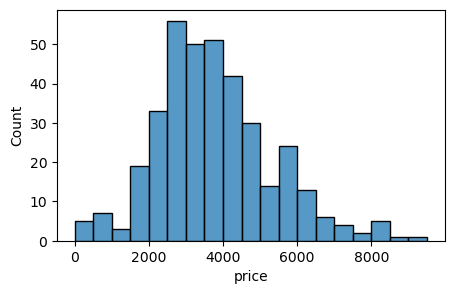

min: 0.0
max: 9500.0


In [73]:
show_data(data, 'price')

Есть записи без указания стоимости квартиры.

In [74]:
data[data['price'] == data['price'].min()]

,district,total_area,living_area,kitchen_area,description,price,rooms,level,first,last,max_level
376,Орджоникидзевский,45.5,32.0,6.0,id:4863. Продам замечательную смежную 2-х комн...,0.0,1,1,1,1,1
379,Орджоникидзевский,55.0,39.0,6.0,id:4252. ВНИМАНИЕ! ЭКСКЛЮЗИВНОЕ ПРЕДЛОЖЕНИЕ РИ...,0.0,3,1,1,1,1


В описании также нет этой информации, поэтому записи придется удалить.

In [75]:
data = data.drop(index=data[data['price'] == data['price'].min()].index)

In [76]:
data[data['price'] == data['price'].min()]

,district,total_area,living_area,kitchen_area,description,price,rooms,level,first,last,max_level
146,Орджоникидзевский,33.0,20.0,6.0,id:28050. Характеристика: Продам однокомнатную...,2.0,1,1,1,0,5


В новом минимальном значении просто неверно указана цена. Исправим ее по информации из описания.

In [77]:
data.loc[146, 'price'] = 2650

In [78]:
data[data['price'] == data['price'].min()]

,district,total_area,living_area,kitchen_area,description,price,rooms,level,first,last,max_level
209,Ленинский (левый берег),42.5,22.0,12.0,id:5433. В продаже однокомнатная квартира приу...,450.0,1,1,1,1,1


Теперь признак выглядит адекватно.

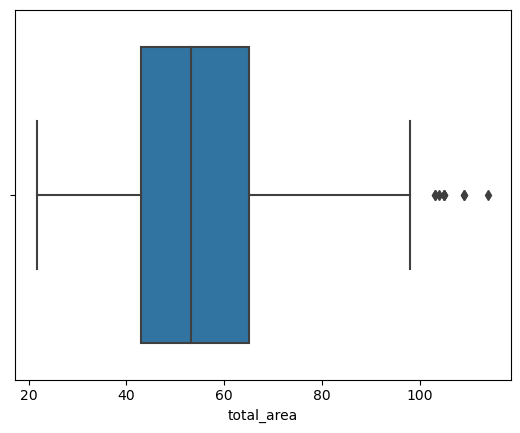

In [79]:
sns.boxplot(x='total_area', data=data)
plt.show();

Проверим скоррелированность данных.

/tmp/ipykernel_45645/544716127.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, cbar=False, linewidths=.5, fmt= '.2f')


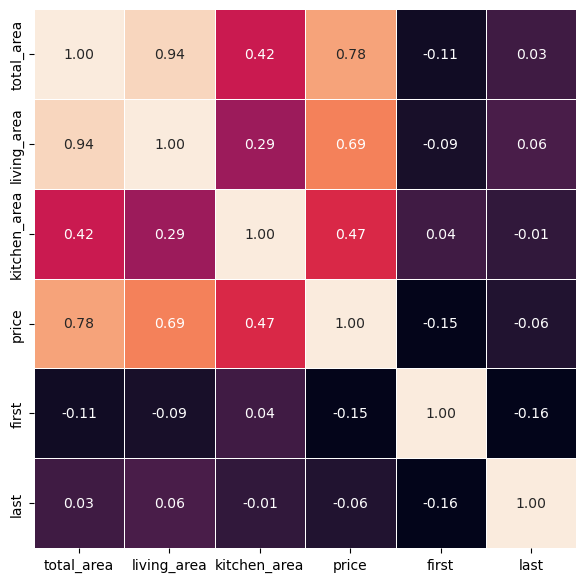

In [80]:
plt.figure(figsize=(7, 7))
sns.heatmap(data.corr(), annot=True, cbar=False, linewidths=.5, fmt= '.2f')
plt.show()

Общая площадь сильно коррелирует с жилой. Для построения моделей будем использовать одну из них.

In [81]:
data.to_csv('cleaned_data.csv', sep='=', index=False)